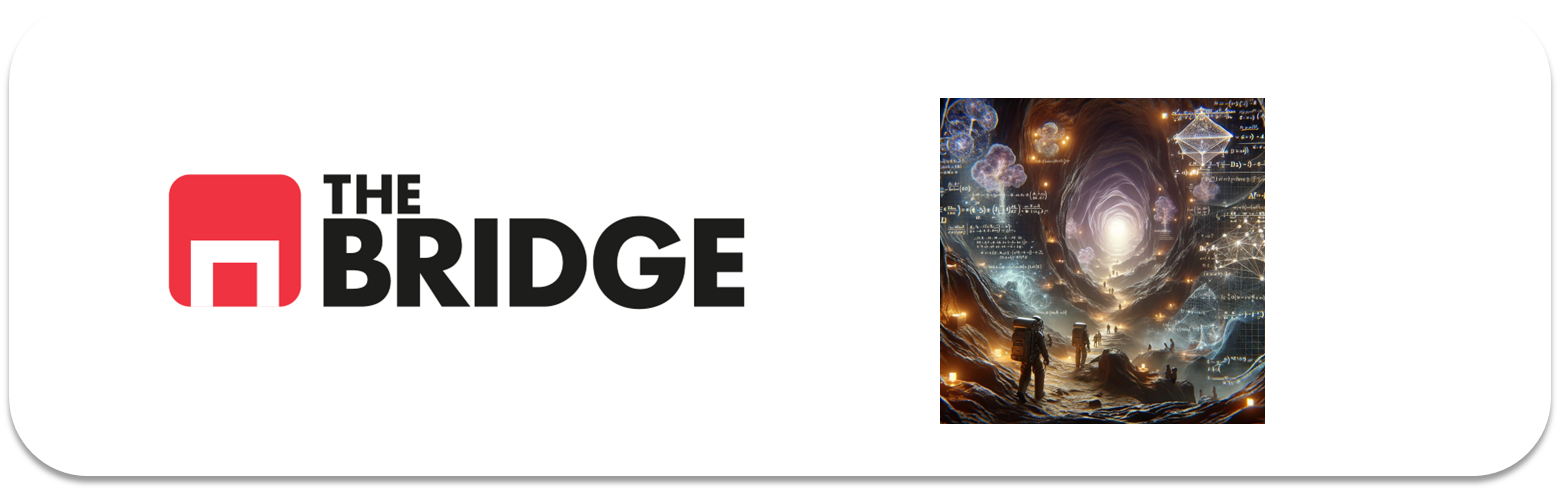

### VIDEOS POST-SESION (A modo de pequeño wrapup "conceptual")

Parte I: https://www.youtube.com/watch?v=MRIv2IwFTPg  
Parte II: https://www.youtube.com/watch?v=uwbHOpp9xkc

## PRACTICA OBLIGATORIA: **Introducción Keras**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

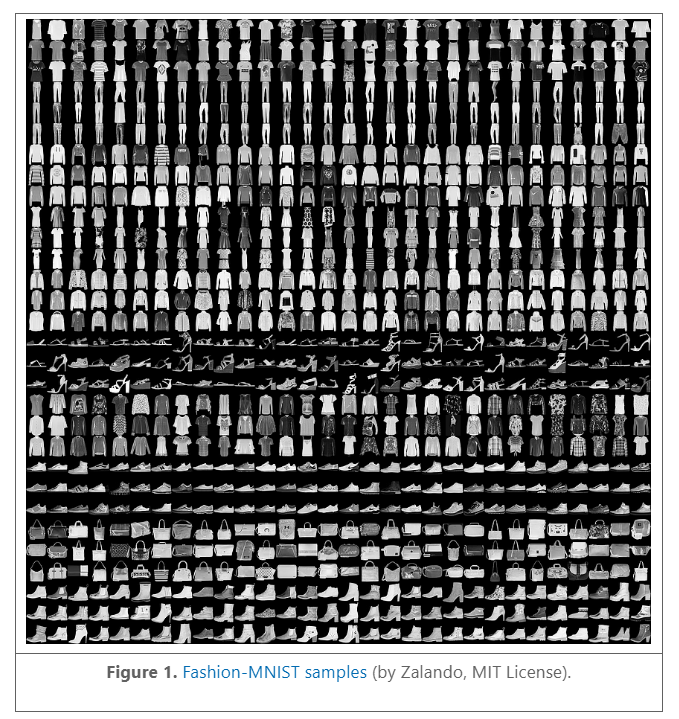

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada. 

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde. 

Ejemplo del grafico de predicción más nivel de confianza:

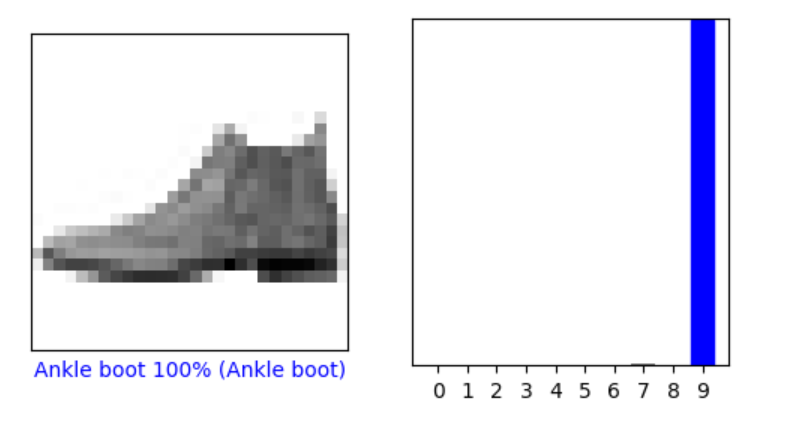

Fíjate que el gráfico de la derecha muestra la probabilidad por clase, de forma que cuanto más alta la probabilidad de la clase elegida más confianza podemos decir que tiene en el resultado. 

**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

```python

# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

```

### #0

*Primero creamos esa lista de clases*

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

*Cargamos los datos*

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

*Exploramos el dataset, formato y luego creamos la función de visualización*

In [9]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
type(train_images)

numpy.ndarray

In [12]:
train_images.shape

(60000, 28, 28)

In [14]:
2 ** 8

256

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

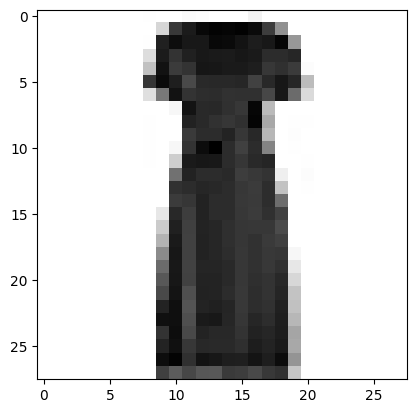

In [17]:
plt.imshow(train_images[50], cmap="Greys")
plt.show()

In [14]:
train_images.size

47040000

In [7]:
train_images.dtype

dtype('uint8')

In [8]:
train_images[300]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

*Imágenes de 28x28 píxeles en blanco y negro, podemos recuperar la función que empleamos con la PCA y modificarla ligeramente*

In [19]:
def show_images_batch(clothes, n_cols, labels = [], names = class_names):
    n_rows = ((len(clothes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * 2, n_rows * 2.2))
    for index, cloth in enumerate(clothes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(cloth, cmap = "Greys")
        plt.axis("off")
        if len(labels):
            plt.title(names[labels[index]])
    #plt.show()

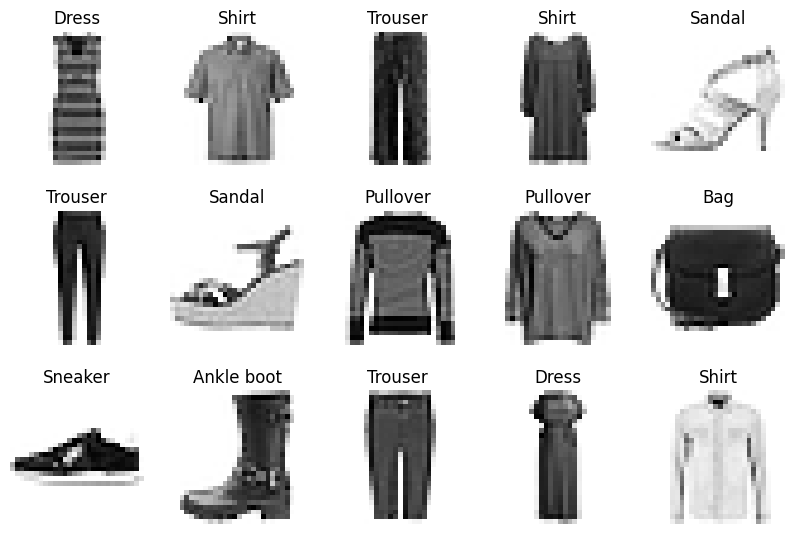

In [21]:
indices = np.random.randint(0,60000,15)
show_images_batch(train_images[indices],labels = train_labels[indices], n_cols = 5)

### #1

*Creados los datasets de train y test, visualizado el dataset, nos toca completar el miniEdad antes de entrar a la topología del modelo*

In [23]:
pd.Series(train_labels).value_counts(True)

9    0.1
0    0.1
3    0.1
2    0.1
7    0.1
5    0.1
1    0.1
6    0.1
4    0.1
8    0.1
Name: proportion, dtype: float64

In [21]:
pd.Series([class_names[label] for label in train_labels]).value_counts(True)

Ankle boot     0.1
T-shirt/top    0.1
Dress          0.1
Pullover       0.1
Sneaker        0.1
Sandal         0.1
Trouser        0.1
Shirt          0.1
Coat           0.1
Bag            0.1
Name: proportion, dtype: float64

*Como ya sabíamos, un dataset perfectamente balanceado*

*Nos falta escalar las features*

In [24]:
train_images = train_images/255
test_images = test_images/255

*Ahora la lista de cositas de un modelo DL hecho por nosotros:*  
*1. Topología.*  
*2. Hiperparámetros: Optimizador, learning_rate, epocas, batch size, la función de pérdida, la métrica (en este caso con todo tan equilibrado nos vale el accuracy)*


In [ ]:
1568, 784, 10

*Topología:*
*Como en el tutorial y en la sesión de wrapup, imágenes, las aplanaremos con una capa Flatten y luego las pasaremos por una capa densa que concentre las features ala PCA, con función de activación ReLU, y luego por una capa de salida con tantas neuronas como clases y una activación softmax para convertir su salida en algo asimilable a una probabilidad*

Input -> Capa Oculta.... Capa Oculta -> Salida

Flatten, Dense (Hidden), Dense (Hidden), Dense (Output)  

Dense Salida -> Units -> 10; Activación = SoftMax;

Input -> Flatten -> Hidden -> Hidden -> Output

n entradas -> m unidades (Reducir o quiero ampliar) [n/m -> 2]

In [30]:
model = keras.Sequential([
    keras.layers.Input(shape = (28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = "relu"), # 28x28 -> 784 -> 128 (Una reducción de dimensionalidad, PCA-like
    keras.layers.Dense(units = 10, activation = "softmax")
])

In [31]:
input_layer = keras.layers.Input(shape = (28,28))
flatten = keras.layers.Flatten()(input_layer)
dense_1 = keras.layers.Dense(units = 300, activation = "relu")(flatten)
dense_2 = keras.layers.Dense(units = 100, activation = "relu")(dense_1)
output = keras.layers.Dense(units = 10, activation = "softmax")(dense_2)

model_2 = keras.Model(inputs = [input_layer], outputs = [output])

In [32]:
model_3 = keras.Sequential([
    keras.layers.Input(shape = (28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 150, activation = "relu"), #150, 300, 200, 300,  -> 784 -> 150
    keras.layers.Dense(units = 75, activation = "relu"), #50, 100, 200, 100,  -> 150 -> 75
    keras.layers.Dense(units = 10, activation = "softmax")
])

In [33]:
optimizador_adam = keras.optimizers.Adam(learning_rate= 0.0001, beta_1= 0.9, beta_2 = 0.999)
optimizador_sgd = keras.optimizers.SGD(learning_rate= 0.01, nesterov= True, momentum= 0.9)

In [ ]:
loss = keras.losses.SparseCategoricalCrossentropy()

In [34]:
model.compile(
    optimizer = optimizador_sgd,
    loss = "sparse_categorical_crossentropy", # 
    metrics = ["accuracy"]
    )


In [35]:
model_2.compile(
    optimizer = "adam", # optimizador_adam
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
    )

0,1,2

Precision clase 0, recall clase 0
Precision clase 1, recall clase 1
Precision clase 2, recall clase 2

recall_score(y_test, y_pred) -> recall (clase 0, clase 1, clase 2, medio) -> recall medio
recall_score() con dos clases -> recall pos_label = [2] -> recall clase 1

from sklearn.metrics import recall_score

recall_score

In [36]:
model_3.compile( optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]
             )

*Dada la cantidad de datos que tenemos un optimizador Adam va bien, como es una clasificación con una única variable usaremos la sparse_categorical_crossentropy como función de pérdida y como ya hemos comentado como el dataset está equilibrado nos vale con la accuracy*

In [24]:
model.compile(
    optimizer = "adam", # Tenemos 28*28*60000 datos más de 47 millones, un Adam va bastante bien
    loss = "sparse_categorical_crossentropy", #
    metrics = ["accuracy"]
)

*Veamos el resumen del modelo*

In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### #2

*Hora de entrenar, usando el 20% de validación, configuraremos 200 épocas y un callback de earlystopping, con 10 épocas de patience*

In [27]:
# Entrenar una época, ver tiempos, volver a construir-compilar, decidir el número de épocas y el patience

In [28]:
#es que el modelo se pierda en un minimo y si no le das tiempo no sale de él... history tienes que ver si hay mucha diferencia entre train y validación.

In [39]:
history = model_2.fit(train_images,
          train_labels,
          validation_split = 0.2,
          epochs = 100,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/100


c:\Users\rodri\Desktop\octubre24\DS_Online_Octubre24_Exercises_Copia\.venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7774 - loss: 0.6199 - val_accuracy: 0.8544 - val_loss: 0.4034
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8640 - loss: 0.3734 - val_accuracy: 0.8742 - val_loss: 0.3564
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8784 - loss: 0.3323 - val_accuracy: 0.8731 - val_loss: 0.3458
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8846 - loss: 0.3097 - val_accuracy: 0.8864 - val_loss: 0.3217
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8910 - loss: 0.2876 - val_accuracy: 0.8779 - val_loss: 0.3441
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8991 - loss: 0.2673 - val_accuracy: 0.8714 - val_loss: 0.3633
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9036 - loss: 0.2537 - val_accuracy: 0.8802 - val_loss: 0.3286
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9075 - loss: 0.2450 - val_

*Una vez entrenado, vamos a mostrar la evolución del entrenamiento*

In [ ]:
history = model.fit(train_images,
          train_labels,
          validation_split = 0.2,
          epochs = 200,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7673 - loss: 0.6842 - val_accuracy: 0.8413 - val_loss: 0.4544
Epoch 2/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8512 - loss: 0.4155 - val_accuracy: 0.8516 - val_loss: 0.4051
Epoch 3/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8658 - loss: 0.3685 - val_accuracy: 0.8642 - val_loss: 0.3772
Epoch 4/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3408 - val_accuracy: 0.8721 - val_loss: 0.3622
Epoch 5/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8845 - loss: 0.3205 - val_accuracy: 0.8729 - val_loss: 0.3474
Epoch 6/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3037 - val_accuracy: 0.8791 - val_loss: 0.3345
Epoch 7/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8914 - loss: 0.2947 - val_accuracy: 0.8768 - val_loss: 0.3458
Epoch 8/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0

In [41]:
df = pd.DataFrame(history.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.816125,0.529768,0.841333,0.454424
1,0.855646,0.403867,0.851583,0.405118
2,0.866292,0.366642,0.864167,0.377213
3,0.875500,0.341974,0.872083,0.362196
4,0.883062,0.321885,0.872917,0.347398
5,0.886104,0.307410,0.879083,0.334514
6,0.891688,0.293796,0.876833,0.345781
7,0.895354,0.284144,0.874083,0.344345
8,0.898229,0.274607,0.878917,0.334711
9,0.901396,0.265824,0.878417,0.337906


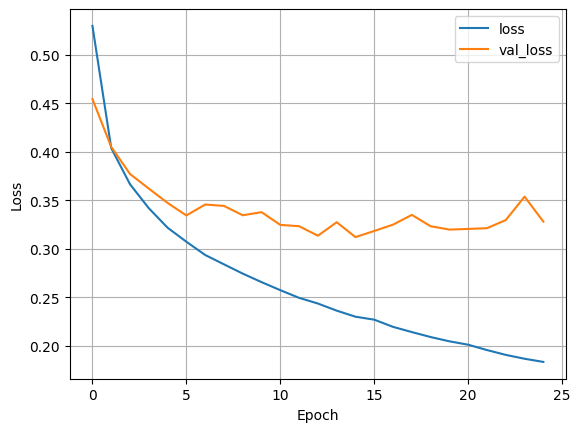

In [44]:
df[["loss","val_loss"]].plot()
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Epoch");

*Podemos esperar un poquito de overfitting y fijarnos en los datos de la 5 época para tener una idea de como irá*

In [45]:
df.loc[5][["accuracy","val_accuracy","loss","val_loss"]]

accuracy        0.886104
val_accuracy    0.879083
loss            0.307410
val_loss        0.334514
Name: 5, dtype: float64

### #3

In [48]:
test_images.shape

(10000, 28, 28)

In [46]:
results = model.evaluate(test_images, test_labels)
print("test loss, test acc:", results)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8844 - loss: 0.3590
test loss, test acc: [0.35573551058769226, 0.8826000094413757]


In [50]:
model_2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8751 - loss: 0.4027


[0.3921188712120056, 0.8737000226974487]

*Un buen 88%, respecto al 89% de train y el 88% de validación, es una muy buena generalización, veamos el report de clasificación, la matriz de confusión y esas imágenes con su nivel de confianza*

In [52]:
temp = model_2.predict(test_images)
temp

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.0111915e-08, 9.0072724e-08, 3.0084345e-07, ..., 1.1334630e-02,
        2.8443190e-09, 9.8846090e-01],
       [1.7877828e-06, 8.3782051e-16, 9.9976820e-01, ..., 1.4649848e-22,
        4.6589237e-16, 2.9748641e-17],
       [4.1397887e-19, 1.0000000e+00, 5.0465272e-26, ..., 1.1836417e-35,
        3.4594682e-24, 4.0982080e-29],
       ...,
       [1.4955091e-06, 7.0509400e-16, 2.2963888e-10, ..., 4.3171156e-15,
        9.9999821e-01, 3.6091305e-18],
       [6.7493955e-18, 1.0000000e+00, 7.9048664e-22, ..., 2.5693070e-26,
        9.8356129e-17, 3.2378099e-21],
       [1.0300817e-07, 2.4505184e-10, 1.2744910e-05, ..., 2.1096901e-05,
        3.4083919e-06, 5.7592771e-08]], dtype=float32)

In [57]:
# temp[0]
class_names[np.argmax(temp[0])]

'Ankle boot'

In [58]:
y_pred = [np.argmax(prediction) for prediction in model_2.predict(test_images)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [59]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.77      0.79      1000
           3       0.93      0.84      0.88      1000
           4       0.83      0.72      0.77      1000
           5       0.96      0.98      0.97      1000
           6       0.60      0.80      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



*Hay algunas clases que destacan por ser casi perfectas (1,5,7,8 y 9), las hay un poco menos buenas (0,3,8), otras ya menos buenas (2,4) y una que es claramente la que más le cuesta (6)*

In [59]:
muy_buenas = [1,5,7,8,9]
print("Muy buenas:",",".join([class_names[label] for label in muy_buenas]))

Muy buenas: Trouser,Sandal,Sneaker,Bag,Ankle boot


In [39]:
buenas = [0,3]
print("Buenas:",",".join([class_names[label] for label in buenas]))

Buenas: T-shirt/top,Dress


In [40]:
regulares = [2,4]
print("Regulares:",",".join([class_names[label] for label in regulares]))

Regulares: Pullover,Coat


In [41]:
flojas = [6]
print("Flojas:",",".join([class_names[label] for label in flojas]))

Flojas: Shirt


In [63]:
dict(enumerate(class_names))

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

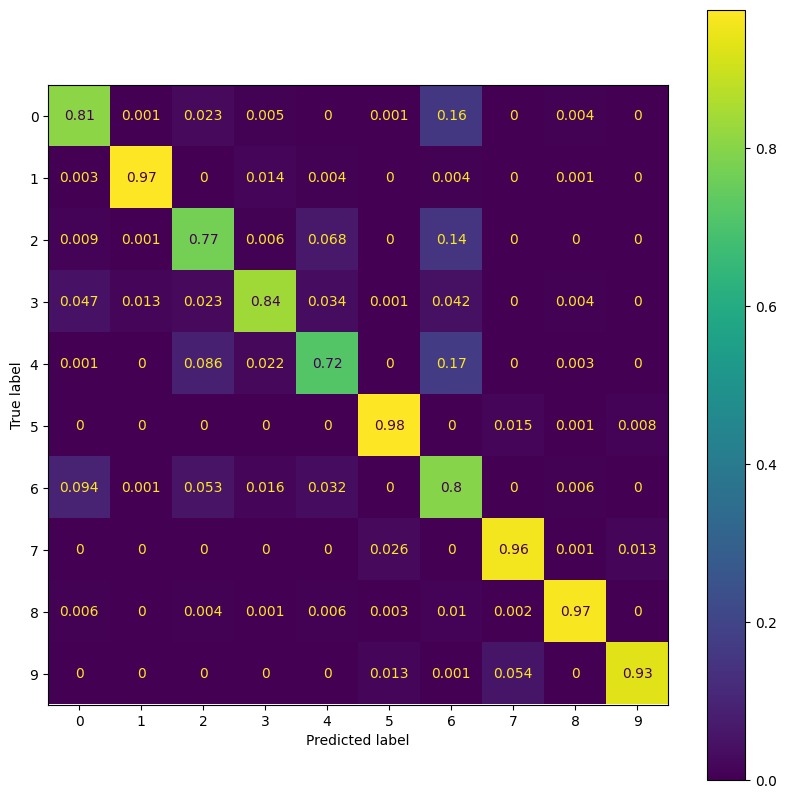

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1,1, figsize = (10,10))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred, normalize = "true", ax = axs);

In [43]:
class_names[2]

'Pullover'

*Fijándonos en las clases más flojas:*  
*La más floja la 6, se confunde más con la 0 y con la 2*  
*La siguiente, la 4, se confunde principalmente con la 2*  
*Veamos algunos ejemplos:*  

In [44]:
df_ys = pd.DataFrame({"True": test_labels, "Predicted": y_pred})

In [45]:
df_ys

,True,Predicted
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [46]:
fallos = df_ys["True"] != df_ys["Predicted"]
aciertos = fallos == False
clase_6_pres = df_ys["Predicted"] == 6
clase_2_real = df_ys["True"] == 2
clase_0_real = df_ys["True"] == 0
clase_4_pres = df_ys["Predicted"] == 4

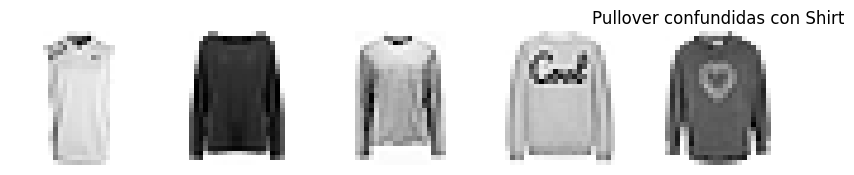

In [47]:
show_images_batch(test_images[df_ys[clase_6_pres & clase_2_real].sample(5).index], n_cols = 5)
plt.title(f"{class_names[2]} confundidas con {class_names[6]}");

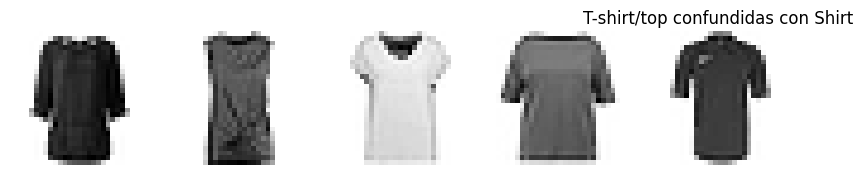

In [48]:
show_images_batch(test_images[df_ys[clase_6_pres & clase_0_real].sample(5).index], n_cols = 5)
plt.title(f"{class_names[0]} confundidas con {class_names[6]}");

*Y ahora las funciones para poder ver las predicciones y el nivel de confianza*

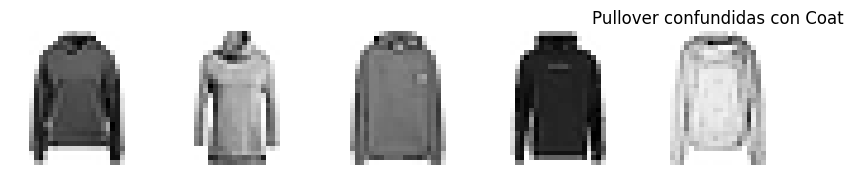

In [49]:
show_images_batch(test_images[df_ys[clase_4_pres & clase_2_real].sample(5).index], n_cols = 5)
plt.title(f"{class_names[2]} confundidas con {class_names[4]}");

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

*Necesitamos las probabilidades*

In [51]:
predictions = model_2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [52]:
predictions[0]

array([6.0289750e-08, 7.5863055e-10, 3.9517228e-10, 3.0341805e-11,
       1.0429634e-08, 4.6917894e-06, 1.1916640e-10, 1.1762668e-02,
       4.8557567e-09, 9.8823255e-01], dtype=float32)

In [53]:
temperatura = 100

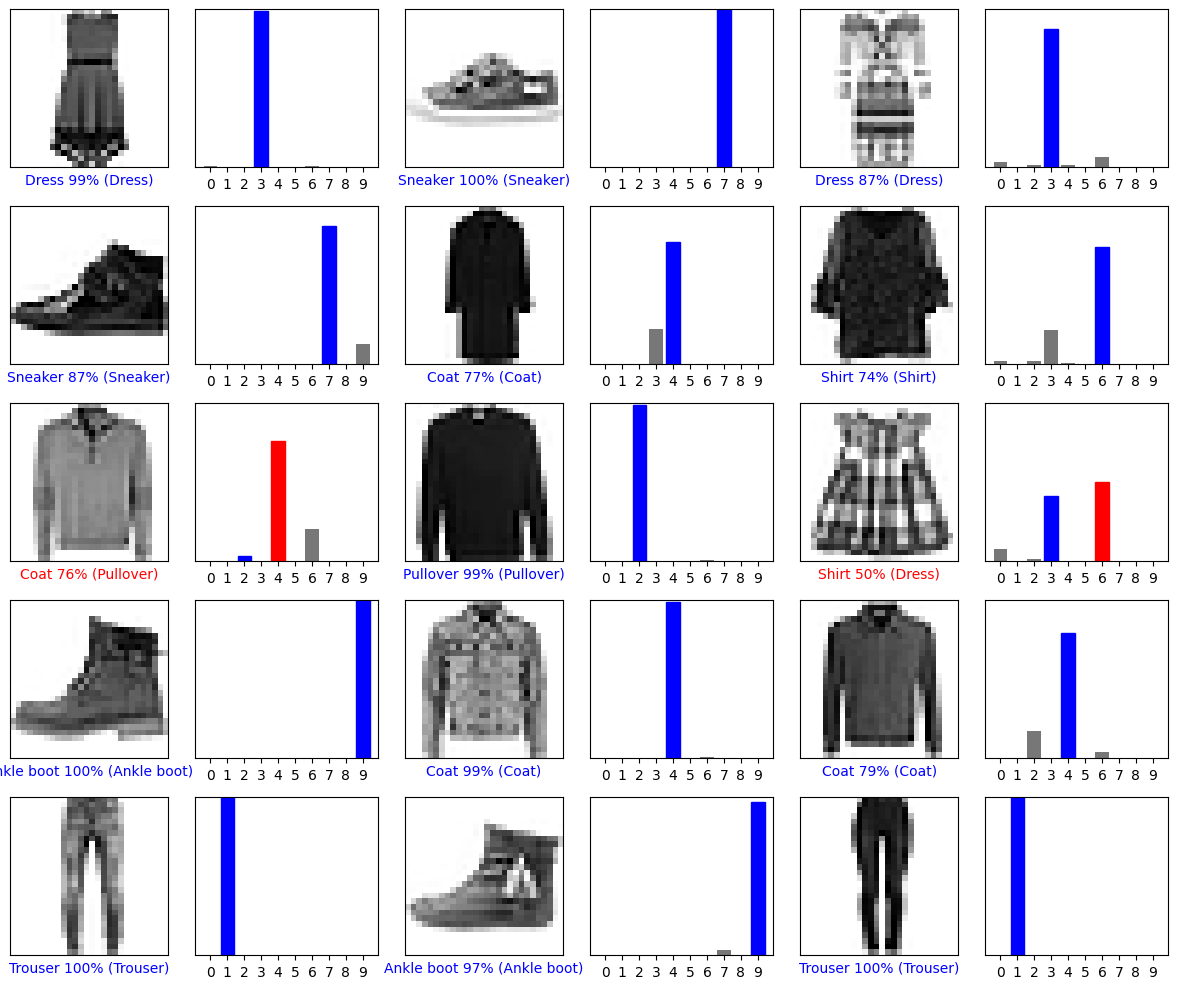

In [54]:
# Pintamos las primeras imágenes, la etiqueta predicha, y la real.
# Las predicciones correctas en azul y las incorrectas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i, j in enumerate(np.random.randint(0, 10000, (15,))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(j, predictions[j], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()

**EXTRA**

*Tenemos que unir la probabilidad al dataframe de las y's*

In [55]:
df_ys["confidence"] = [ prediction.max() for prediction in predictions]

In [56]:
df_ys

,True,Predicted,confidence
0,9,9,0.988233
1,2,2,0.998062
2,1,1,1.000000
3,1,1,1.000000
4,6,6,0.902374
...,...,...,...
9995,9,9,0.999999
9996,1,1,0.999999
9997,8,8,0.999966
9998,1,1,1.000000


In [57]:
confidence_over_70 = df_ys["confidence"] >= 0.7
df_ys[fallos & confidence_over_70]["Predicted"].value_counts(True)

Predicted
6    0.325623
4    0.145907
2    0.126335
3    0.115658
7    0.092527
0    0.078292
9    0.053381
8    0.035587
5    0.023132
1    0.003559
Name: proportion, dtype: float64

*La clase predicha con más confianza y de forma más equivocada es la 0*

In [58]:
df_ys[fallos & confidence_over_70]["True"].value_counts(True)

True
0    0.190391
6    0.181495
2    0.179715
4    0.169039
5    0.064057
9    0.062278
3    0.058719
7    0.039146
1    0.032028
8    0.023132
Name: proportion, dtype: float64

*La clase real que más se confunde es la 6 por sobreconfianza*